In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

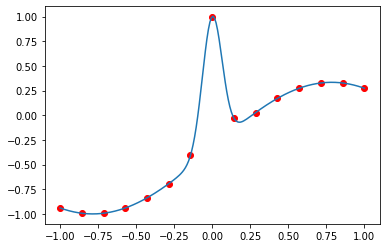

In [2]:
n=15
X=np.linspace(-1,1,n)[:,None]
f= lambda x: 2/3*np.sin(2*x)+4/3*np.exp(-30*(2*x)**2)-1/3  
Y=np.array([f(x) for x in X]).reshape(-1,1)
Xt=np.linspace(-1,1,200)[:,None]
Yt=np.array([f(x) for x in Xt]).reshape(-1,1)
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [20]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp',zero_mean=0)
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp',zero_mean=0)
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-8,name='sexp',zero_mean=0,scale_est=1)
ker_all=combine(ker1,ker2,ker3)
m=dgp(X,Y,ker_all)

In [21]:
m.train(N=200,burnin=50,method='L-BFGS-B')

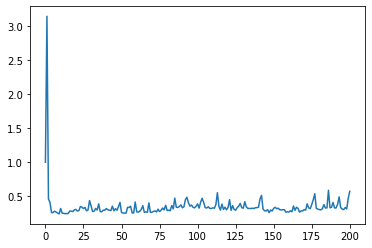

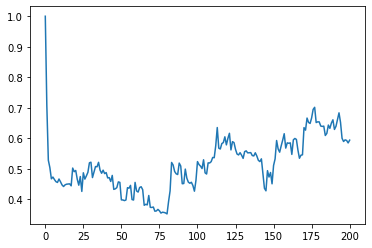

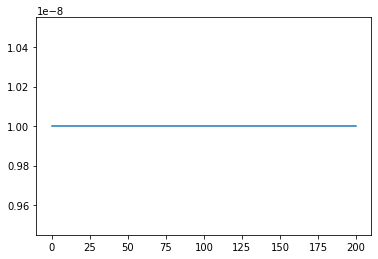

In [24]:
m.plot(2)

In [36]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, method='mean_var')

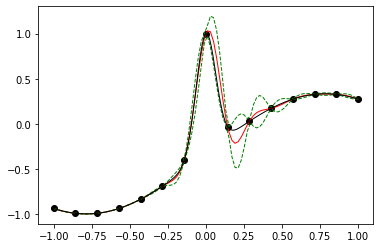

In [37]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

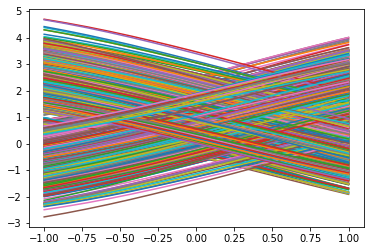

In [38]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[0][i],m.samples[1][i])

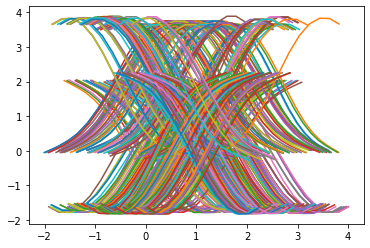

In [30]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[1][i],m.samples[2][i])

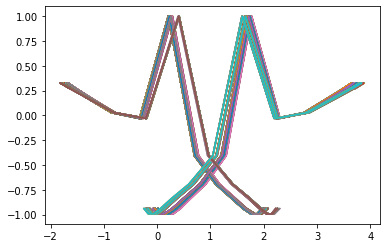

In [31]:
for i in range(len(m.samples[0])):
    plt.plot(m.samples[2][i],m.samples[3][i])